# 展示使用matplotlib进行曲线可视化的基本代码 

### Python+Matplotlib库的简单使用(无交互) 

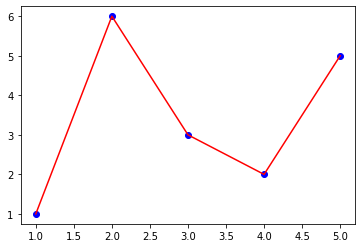

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# np.set_printoptions(precision=2) #设置小数位置为3位
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

x=[1,2,3,4,5]
y = [1,6,3,2,5]

plt.scatter(x,y,c='b')
plt.plot(x,y,'r')

### 交互1：鼠标点击，增加新的点

In [4]:
%matplotlib qt5 
# ok 但不是嵌入式的

import matplotlib.pyplot as plt
import numpy as np

x=[1,2,3,4,5]
y = [10,20,30,40,50]

fig,ax = plt.subplots(nrows=1,ncols=1)

control_scatter = 0
constrol_plot = 0

def drawOP():
    global constrol_plot,control_scatter
    control_scatter = ax.scatter(x,y,c='b')
    constrol_plot = ax.plot(x,y,'r')
drawOP()



def onclick2(event):
    global ax,x,y,control_scatter,control_plot
    print('on click2 is pressed')
    print('coords: ',event.x, event.y, event.xdata, event.ydata)
    x.append(event.xdata)
    y.append(event.ydata)
    
    pts = np.array([x,y]).transpose()
#     print(pts.shape)
    control_scatter.set_offsets(pts) # set_offsets  输入数据是[N,2] 
    
    fig.canvas.draw_idle()
    
fig.canvas.mpl_connect('button_press_event', onclick2)

plt.show()

on click2 is pressed
coords:  590 725 2.1838709677419357 36.238095238095234
(6, 2)
on click2 is pressed
coords:  907 827 3.310483870967742 41.11904761904762
(7, 2)
on click2 is pressed
coords:  1185 610 4.29516129032258 30.761904761904763
(8, 2)


![事件列表](./交互绘图事件列表.png)

![事件属性](./交互绘图事件属性.png)

In [3]:
def searchpoint(x,y,xdata,ydata,epison=0.01):
    datalen = len(x)
    ptid = None
    for k in range(datalen):
        if np.abs(x[k]- xdata) < epison and np.abs(y[k] - ydata) < epison:
            ptid = k
            break
        
    return ptid

g_ptid = None
def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))
    global g_ptid
    g_ptid = searchpoint(x,y,event.xdata,event.ydata,epison=0.5)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

def onrelease(event):
    print('%s release: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))
    global g_ptid
    if None != g_ptid:
        print('ptid:',g_ptid)
    else:
        print('ptid is None')
cid = fig.canvas.mpl_connect('button_release_event',onrelease)

def updatedata(x,y,ptid,nx,ny):
    x[ptid] = nx
    y[ptid] = ny

def onmousemove(event):
    if event.button == None:
        return
    global g_ptid
#     print('%s mouse move: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
#           ('double' if event.dblclick else 'single', event.button,
#            event.x, event.y, event.xdata, event.ydata))
    if None == g_ptid:
        return
    
    updatedata(x,y,g_ptid,event.xdata,event.ydata)
    ax.cla()
    drawOP()
    fig.canvas.draw_idle()
    
    
cid = fig.canvas.mpl_connect('motion_notify_event',onmousemove)

# 其他交互事件：key_press_event，key_release_event,scroll_event



single click: button=1, x=400, y=402, xdata=2.193070, ydata=33.294334
single release: button=1, x=400, y=402, xdata=2.193070, ydata=33.294334
ptid is None
single click: button=1, x=1572, y=847, xdata=2.996016, ydata=30.114475
single release: button=1, x=1150, y=1190, xdata=2.215313, ydata=41.995585
ptid: 2
single click: button=1, x=1540, y=1295, xdata=2.935962, ydata=45.637969
single release: button=1, x=1620, y=1355, xdata=3.083787, ydata=47.719331
ptid is None
single click: button=1, x=2112, y=1132, xdata=3.993837, ydata=40.000946
single release: button=1, x=2200, y=950, xdata=0.762618, ydata=0.583412
ptid: 3
single click: button=1, x=2195, y=950, xdata=4.146282, ydata=33.670136
single release: button=1, x=1992, y=912, xdata=3.772099, ydata=32.369284
ptid: 3
single click: button=1, x=1995, y=917, xdata=3.776719, ydata=32.542731
single release: button=1, x=2045, y=845, xdata=3.869109, ydata=30.027751
ptid: 3
